In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize, signal, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
R = 8.31446261815324  # J/mol.K
T0 = 292.05           # K
p0 = 101600           # Pa
V = 190e-6            # m3 of isopropanol
m = 2.7677            # g of Raney Nickel
rho = 785             # kg/m³
M = 60.1              # g/mol
n0 = 1000*rho*V/M     # mol

In [3]:
n0

2.4816971713810316

In [4]:
k = 8.765e-6
b = 8.901e5
a = 1.234e4

In [5]:
def model(t, x, k, a, b, n0):
    return np.array([
        k*(a*(n0 - x))/(a*(n0 - x) + b*x)
    ])

In [6]:
t = np.linspace(0, 10000, 1001)

In [7]:
sol = integrate.solve_ivp(model, [t.min(), t.max()], y0=[0], args=(k, a, b, n0), t_eval=t)

In [8]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([    0.,    10.,    20., ...,  9980.,  9990., 10000.])
 t_events: None
        y: array([[0.00000000e+00, 8.75386335e-05, 1.74855651e-04, ...,
        5.02568318e-02, 5.02920124e-02, 5.03271778e-02]])
 y_events: None

In [9]:
xi = sol.y[0,:]

In [10]:
r = model(t, xi, k, a, b, n0).squeeze()

In [17]:
A = (n0 - xi)/V
B = xi/V

In [18]:
data = pd.DataFrame({"t": t, "xi": xi, "r": r, "A": A, "B": B})

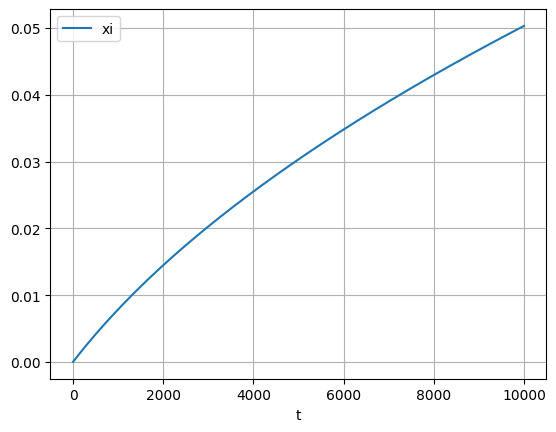

In [12]:
axe = data.plot(x="t", y="xi")
axe.grid()

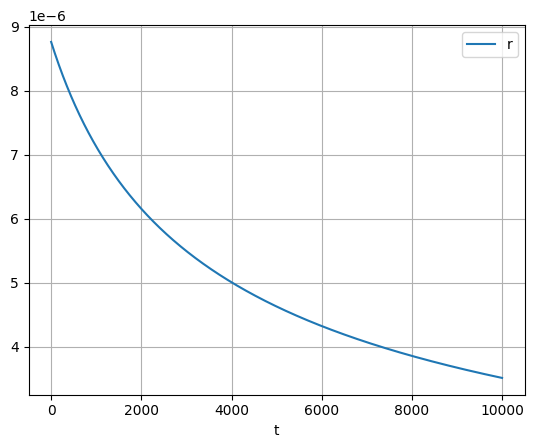

In [13]:
axe = data.plot(x="t", y="r")
axe.grid()

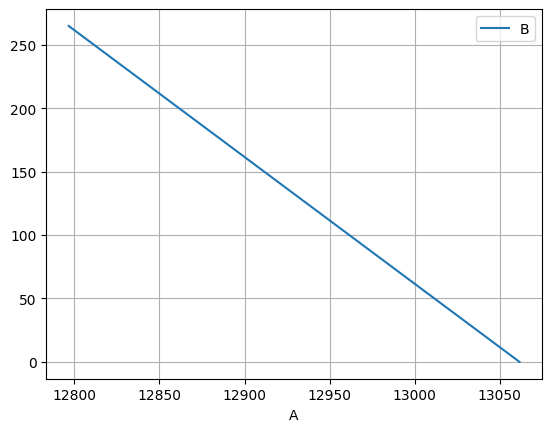

In [19]:
axe = data.plot(x="A", y="B")
axe.grid()

In [14]:
def wrapped(x, k, a, b):
    return model(t, x, k, a, b, n0)[0]

In [15]:
optimize.curve_fit(wrapped, xi, r)#, p0=[1, 1e5, 1e5])

(array([8.76500000e-06, 1.38568895e+02, 9.99515184e+03]),
 array([[7.82920937e-45, 5.42532091e-31, 3.91335556e-29],
        [5.42532096e-31, 2.45096777e-15, 1.76791447e-13],
        [3.91335552e-29, 1.76791447e-13, 1.27521937e-11]]))